In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#IMPORT DATASETS
data1=pd.read_csv('auto_imports.csv')

## BASIC CHECKS

In [4]:
data1.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
data1.tail()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
data1.shape

(200, 26)

In [7]:
# Define the special characters representing missing values
missing_values = ["?"]

# Load the dataset into a DataFrame, specifying missing values
data = pd.read_csv("auto_imports.csv", na_values=missing_values)  # Replace "your_dataset.csv" with the actual path to your dataset file

# Check the data types of columns after loading the dataset
print(data.dtypes)

3                int64
?              float64
alfa-romero     object
gas             object
std             object
two             object
convertible     object
rwd             object
front           object
88.60          float64
168.80         float64
64.10          float64
48.80          float64
2548             int64
dohc            object
four            object
130              int64
mpfi            object
3.47           float64
2.68           float64
9.00           float64
111            float64
5000           float64
21               int64
27               int64
13495            int64
dtype: object


In [8]:
#since column names are missing in the dataset we have to assign the proper names 
# List of attribute names
attributes = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
    "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]

# Assign the attribute names as column names to the DataFrame
data.columns = attributes

In [9]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [9]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
199,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [10]:
data.shape

(200, 26)

In [11]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.830000,1.248557,-2.00,0.000,1.00,2.000,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.000,115.00,150.000,256.00
wheel-base,200.0,98.848000,6.038261,86.60,94.500,97.00,102.400,120.90
length,200.0,174.228000,12.347132,141.10,166.675,173.20,183.500,208.10
width,200.0,65.898000,2.102904,60.30,64.175,65.50,66.675,72.00
height,200.0,53.791500,2.428449,47.80,52.000,54.10,55.525,59.80
curb-weight,200.0,2555.705000,518.594552,1488.00,2163.000,2414.00,2928.250,4066.00
engine-size,200.0,126.860000,41.650501,61.00,97.750,119.50,142.000,326.00
bore,196.0,3.330000,0.271303,2.54,3.150,3.31,3.590,3.94
stroke,196.0,3.259847,0.317383,2.07,3.110,3.29,3.410,4.17


In [14]:
data.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### INSIGHTS
*The column normalized-loss shows 36 missing values

*The column num-of-doors shows 2 missing values

*The columns bore and stoke shows 4 missing values each

*The columns horsepower and peak-rpm shows 2 missing values each

### HANDLING THE MISSING VALUES 

In [15]:
# Impute missing values of normalized-losses with the median of the column
median_value = data["normalized-losses"].median()
data["normalized-losses"].fillna(median_value, inplace=True)

In [16]:
# Impute missing values of num-of-doors with the mode of the column
mode_value = data["num-of-doors"].mode()[0]  # Calculate the mode value
data["num-of-doors"].fillna(mode_value, inplace=True)

In [17]:
# Impute missing values in the "stroke" column with the mean
stroke_mean = data["stroke"].mean()
data["stroke"].fillna(stroke_mean, inplace=True)

In [18]:
# Impute missing values in the "bore" column with the mean
bore_mean = data["bore"].mean()
data["bore"].fillna(bore_mean, inplace=True)

In [19]:
# Impute missing values in the "horsepower" column with the mean
horsepower_mean = data["horsepower"].mean()
data["horsepower"].fillna(horsepower_mean, inplace=True)

In [20]:
# Impute missing values in the "peak-rpm" column with the mean
peak_rpm_mean = data["peak-rpm"].mean()
data["peak-rpm"].fillna(peak_rpm_mean, inplace=True)

In [21]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### INSIGHTS 
* After handling all the outilers there are zero missing values 

In [22]:
data.describe(include=['O'])#It will give you info about categorical data/columns

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200,200,200
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,115,94,118,197,145,156,91


# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [23]:
!pip install sweetviz

In [24]:
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(data) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## INSIGHTS FOR UNIVARIATE ANALYSIS

*Most number of normalized loss are between 100-150

*Toyota and nissan are the two leading companies which have made the most number of cars 

*90% of cars are gas type cars only 10% cars are deisel type

*The std aspiration type has been used more frequently than turbo,it is because of the cost-effectiveness

*The four door cars are used mostly than two door cars, it is because the foor door cars are compactible for families while the two door cars are for exclusive and high-end model cars

*Sedan and Hatchback bodystyle cars are used mostly because of the low pricing,while hardtop and convertible cars are quite expensive

*FWD has been used mostly than rwd and 4wd

*Front located engine cars are more used than back located cars

*The wheel-base of 95-100 are more used by all companies

*The most frequently used lengths in the cars are 157 and 188

*Most number of cars are of width between 64 to 68

*Most number of cars are of height between 51 to 57

*Most number of cars are of curb-weight between 2500 to 3200

*OHC type of engines are mostly used among the four types

*4V cylinders are mostly used in all the cars

*MPFI and 2BBL are the two types of fuel systems are widely used 

*Every car companies produce cars with the peak rpm ranges from 4.5k to 5.5k

*80% car prices ranges from 5k to 20k

## BIVARIATE ANALYSIS

## Checking relationship of all variables with respect to target variable 

import sweetviz as sv

# Perform bivariate analysis for the target variable "price"
report = sv.analyze(data, target_feat='price')

# Generate the report and save it as an HTML file
report.show_html('bivariate_analysis_report.html')

# INSIGHTS FOR BIVARIABLE ANALYSIS

*Symboling means car insurance risk level,so here the 0 risk level have occured most of the time which means most of the cars are safe for affortable price

*Normalized-loss are mostly ranged from 100 to 125 for the cars with lower price

*Toyata,Mazda,Nissan,Mitubishi,hond and volkswagen are the compainies which make cars for the price below 15k which was affortable by everyone,while companies like mercedes-benz,porsche,jaguar make exclusive cars which ranhes from 30k to 25k

*Gas type cars are less in price while compared to the deisel type cars

*The price of std aspiration is low when compared to turbo

*The four door cars are mostly used but the average price is also high when compared to two door cars

*Sedan,Hatchback and Wagon bodytype cars are in affortable prices,while hardtop and convertible bodytypes are expensive which was used in exclusive cars

*FWD and 4WD bth are at lower prices,while RWD prices are very high

*Cars which have engine on the front side costs much lower than the cars which has it on the backside

*The wheel-base is lower the price of the car was also low,when the wheel-base increases the price also increases

*The length of the vehicle is directly proportional to the price of the car,when the length increases the price also increases

*Same for the width when the width increases the price also increase

*Here when the price is very hight for the lowest height and the price is affortable for the cars which have height ranges from 50 to 56

*As the curb-weight increses the price of the vehicle also increases

*Only the cars which have OHCV type of engine have higher price,cars having other type of engines costs low

*Only twelve and eight cylinder cars are of high cost,while other cylinder cars are of lower price

*As the engine size increases the price also increases

*The fuel systems like MPFI AND IDI are used in the high-end cars ,while other fuel sysytems are used in low-end cars

*The horse power increase and the price also increases because to increases the horse power we need more components

*Higher city-mpg values indicate better fuel efficiency, which may be valued by consumers

*Higher highway-mpg values indicate better fuel efficiency, which may influence pricing decisions,since there are some cars with lower highwag-mpg with higher prices it can be found only on luxury cars

                                                     


In [25]:
# Separate categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [26]:
categorical_col = []#list
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")

make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
engine-type : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
num-of-cylinders : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [27]:
## Create a new dataframe with categorical variables only
data2=data[[ 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']]

In [28]:
data2.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi


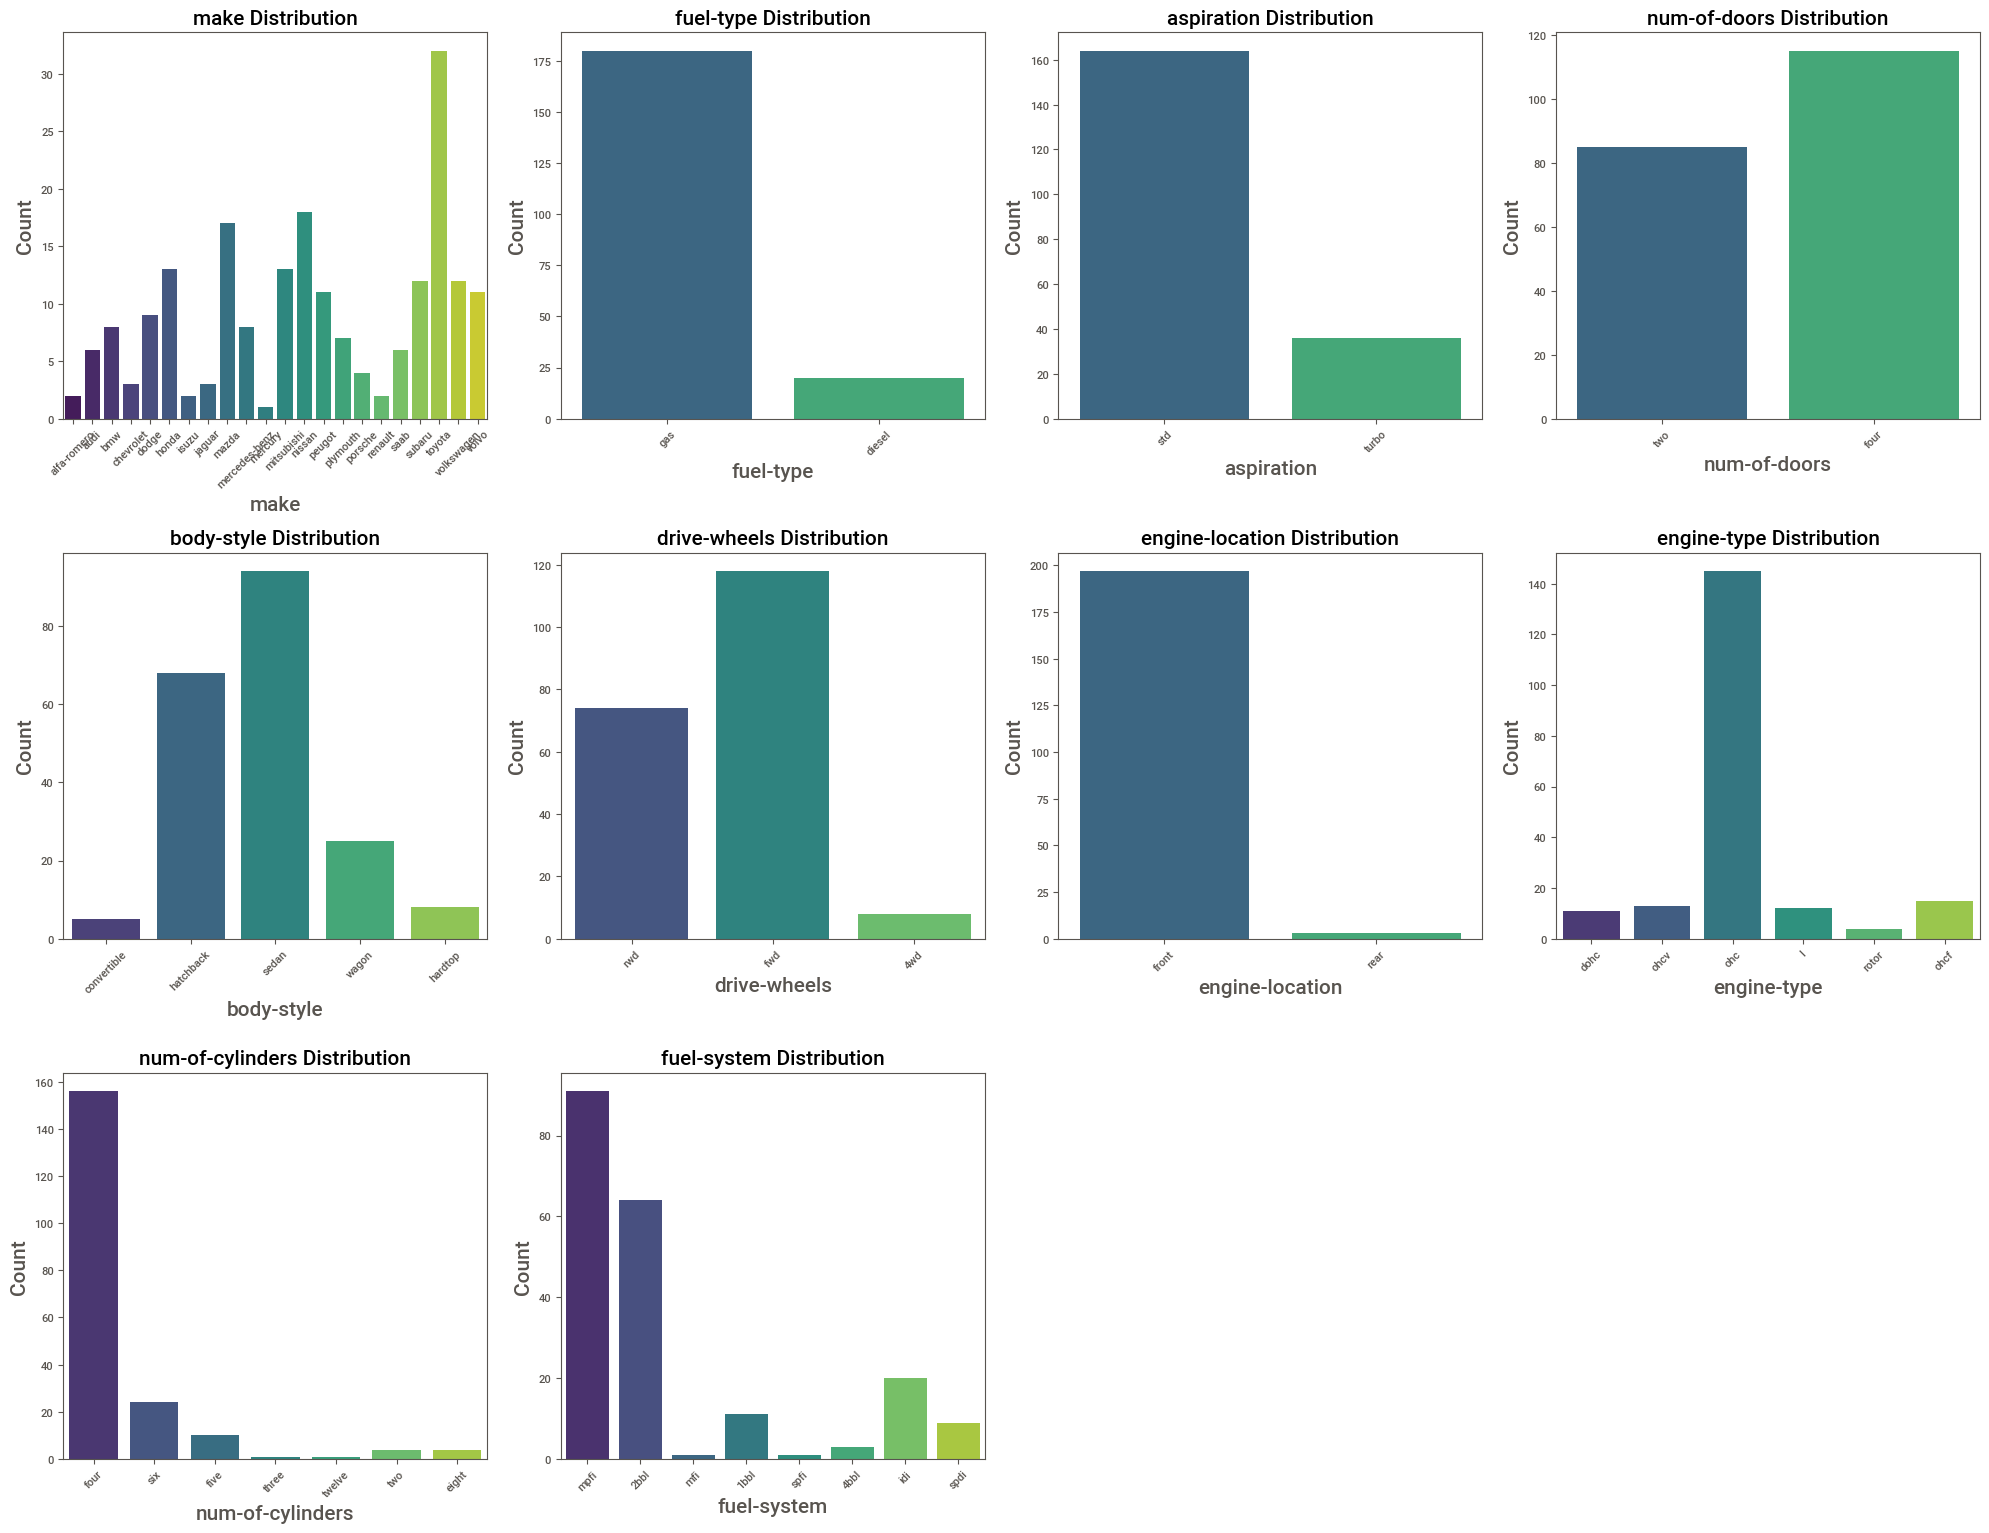

In [29]:
plt.figure(figsize=(20, 20))  # Canvas size
plot_number = 1  # Counter for the number of plots

for column in data2.columns:
    ax = plt.subplot(4, 4, plot_number) 
    sns.countplot(data=data2, x=column, palette='viridis')
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis and increasing its font 
    plt.ylabel('Count', fontsize=15)  # Assigning name to y-axis and increasing its font 
    plt.title(f'{column} Distribution', fontsize=15)  # Adding title
    plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
    plot_number += 1  # Increasing counter by 1

plt.tight_layout()  # Adjusting the layout
plt.show()  # Showing the plot

In [30]:
numerical_col = []#list for continous columns
for column in data.columns:#acessing columns from datasets
    if data[column].dtype == "int64" and len(data[column].unique()) >= 10: #checking whether it's datatype is int and count of unique label greater than 10  
        numerical_col.append(column) # inserting those columns in list 
        print(f"{column} : {data[column].unique()}")   

curb-weight : [2548 2823 2337 2824 2507 2844 2954 3086 2395 2710 2765 3055 3230 3380
 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819 1837
 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950 1890
 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515 3750
 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328 2833
 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008 2324
 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485 3130
 2818 2778 2756 2800 2579 2460 2658 2695 2707 2758 2808 2847 2050 2120
 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280 3110 2081
 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551 2679 2714
 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264 2212 2319
 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 2952 3049 3012 3217
 3062]
engine-size : [130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308

In [31]:
numerical_col

['curb-weight', 'engine-size', 'city-mpg', 'highway-mpg', 'price']

In [32]:
data3=data[['curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']]

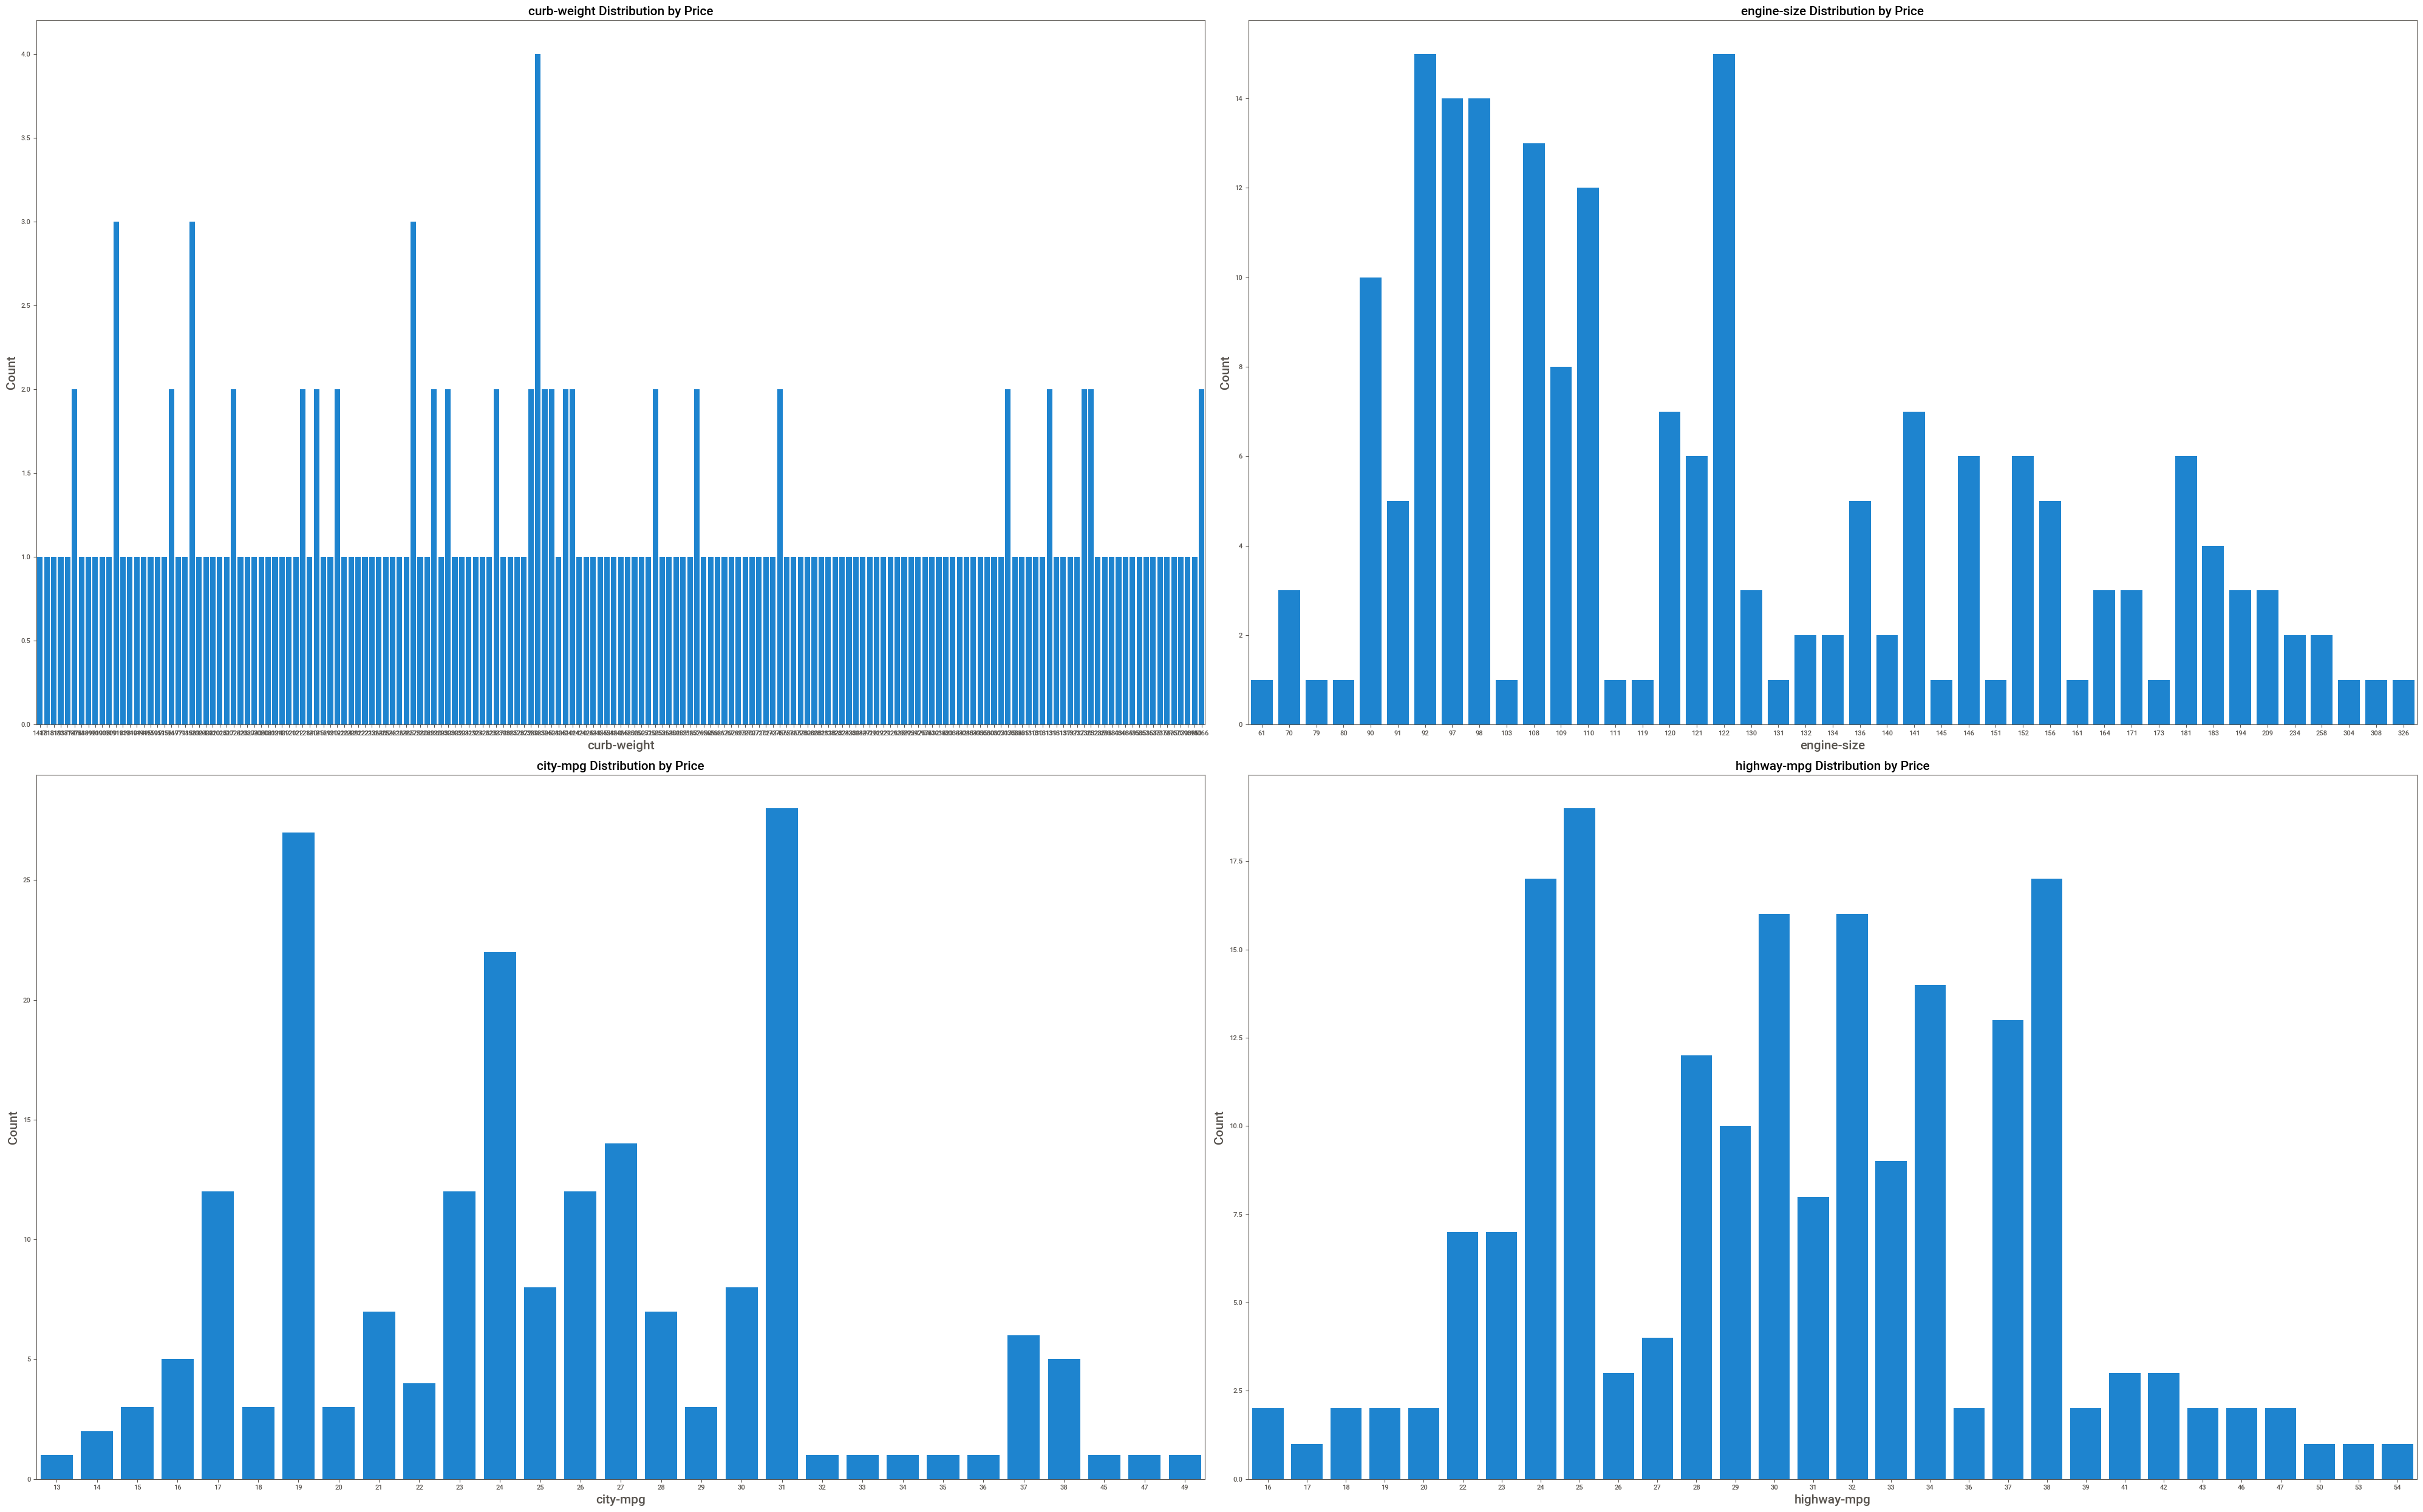

In [33]:

plt.figure(figsize=(40, 25))  # Canvas size
plot_number = 1  # Counter for the number of plots

for column in data3.columns:  # Accessing columns from data1 DataFrame
    ax = plt.subplot(2,2, plot_number) 
    sns.countplot(data=data3, x=column)
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis and increasing its font 
    plt.ylabel('Count', fontsize=15)  # Assigning name to y-axis and increasing its font 
    plt.title(f'{column} Distribution by Price', fontsize=15)  # Adding title
    plot_number += 1  # Increasing counter by 1

plt.tight_layout()  # Adjusting the layout
plt.show()  # Showing the plot

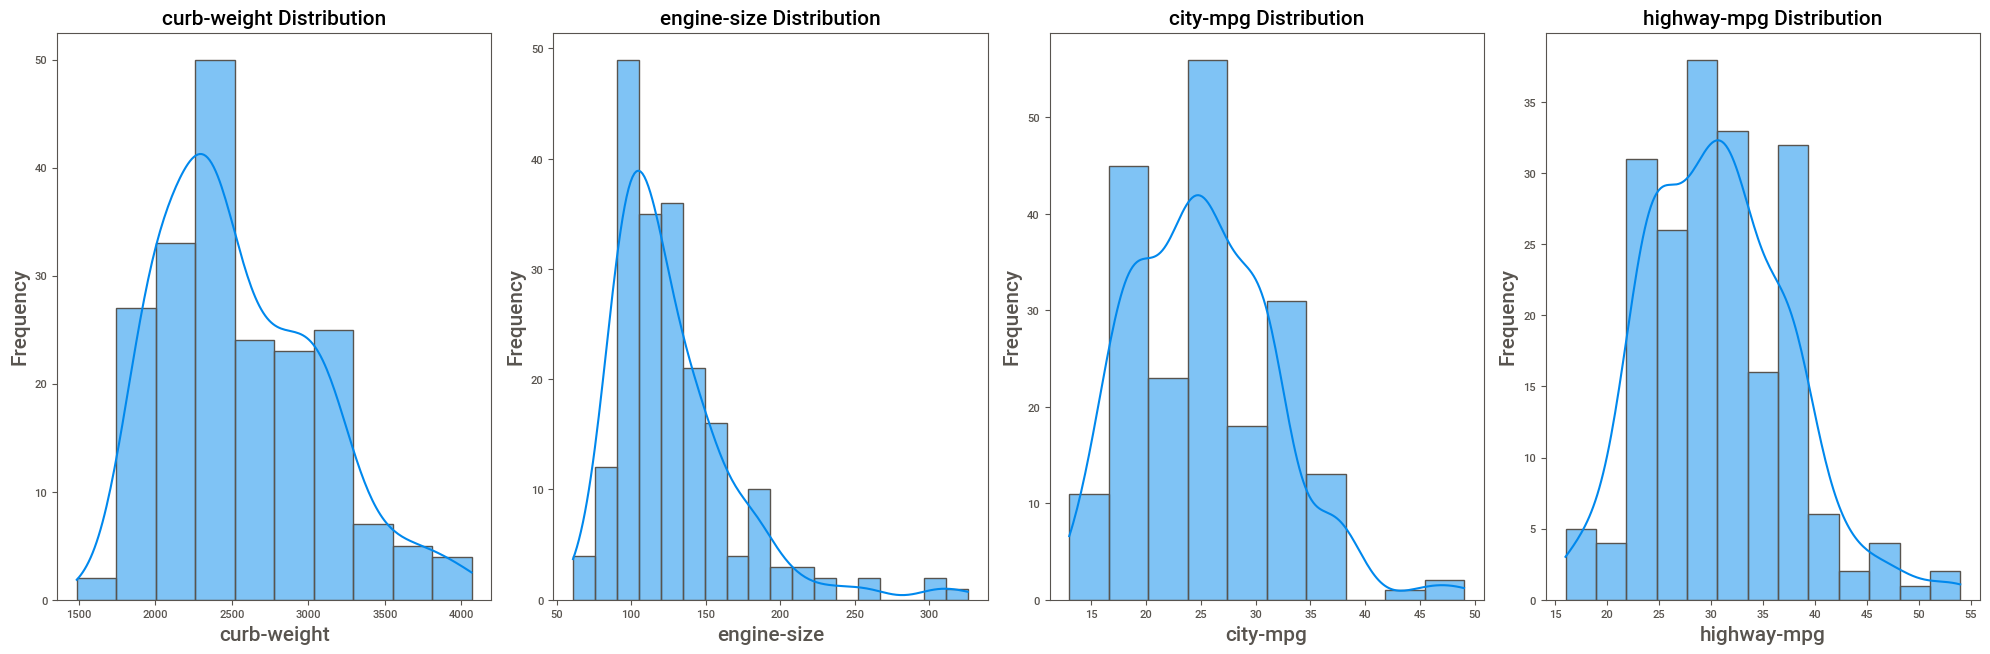

In [34]:
plt.figure(figsize=(20, 25))  # Canvas size
plot_number = 1  # Counter for the number of plots

for column in data3.columns:  # Accessing columns from data2 DataFrame
    ax = plt.subplot(4, 4, plot_number) 
    sns.histplot(data=data, x=column, kde=True)
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis and increasing its font 
    plt.ylabel('Frequency', fontsize=15)  # Assigning name to y-axis and increasing its font 
    plt.title(f'{column} Distribution', fontsize=15)  # Adding title
    plot_number += 1  # Increasing counter by 1

plt.tight_layout()  # Adjusting the layout
plt.show()  # Showing the plot

In [35]:
discrete_columns = []

for column in data.columns:
    if data[column].nunique() < 10:  # Adjust the threshold as needed
        discrete_columns.append(column)

print("Discrete columns:", discrete_columns)


Discrete columns: ['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [36]:
data4=data[['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']]

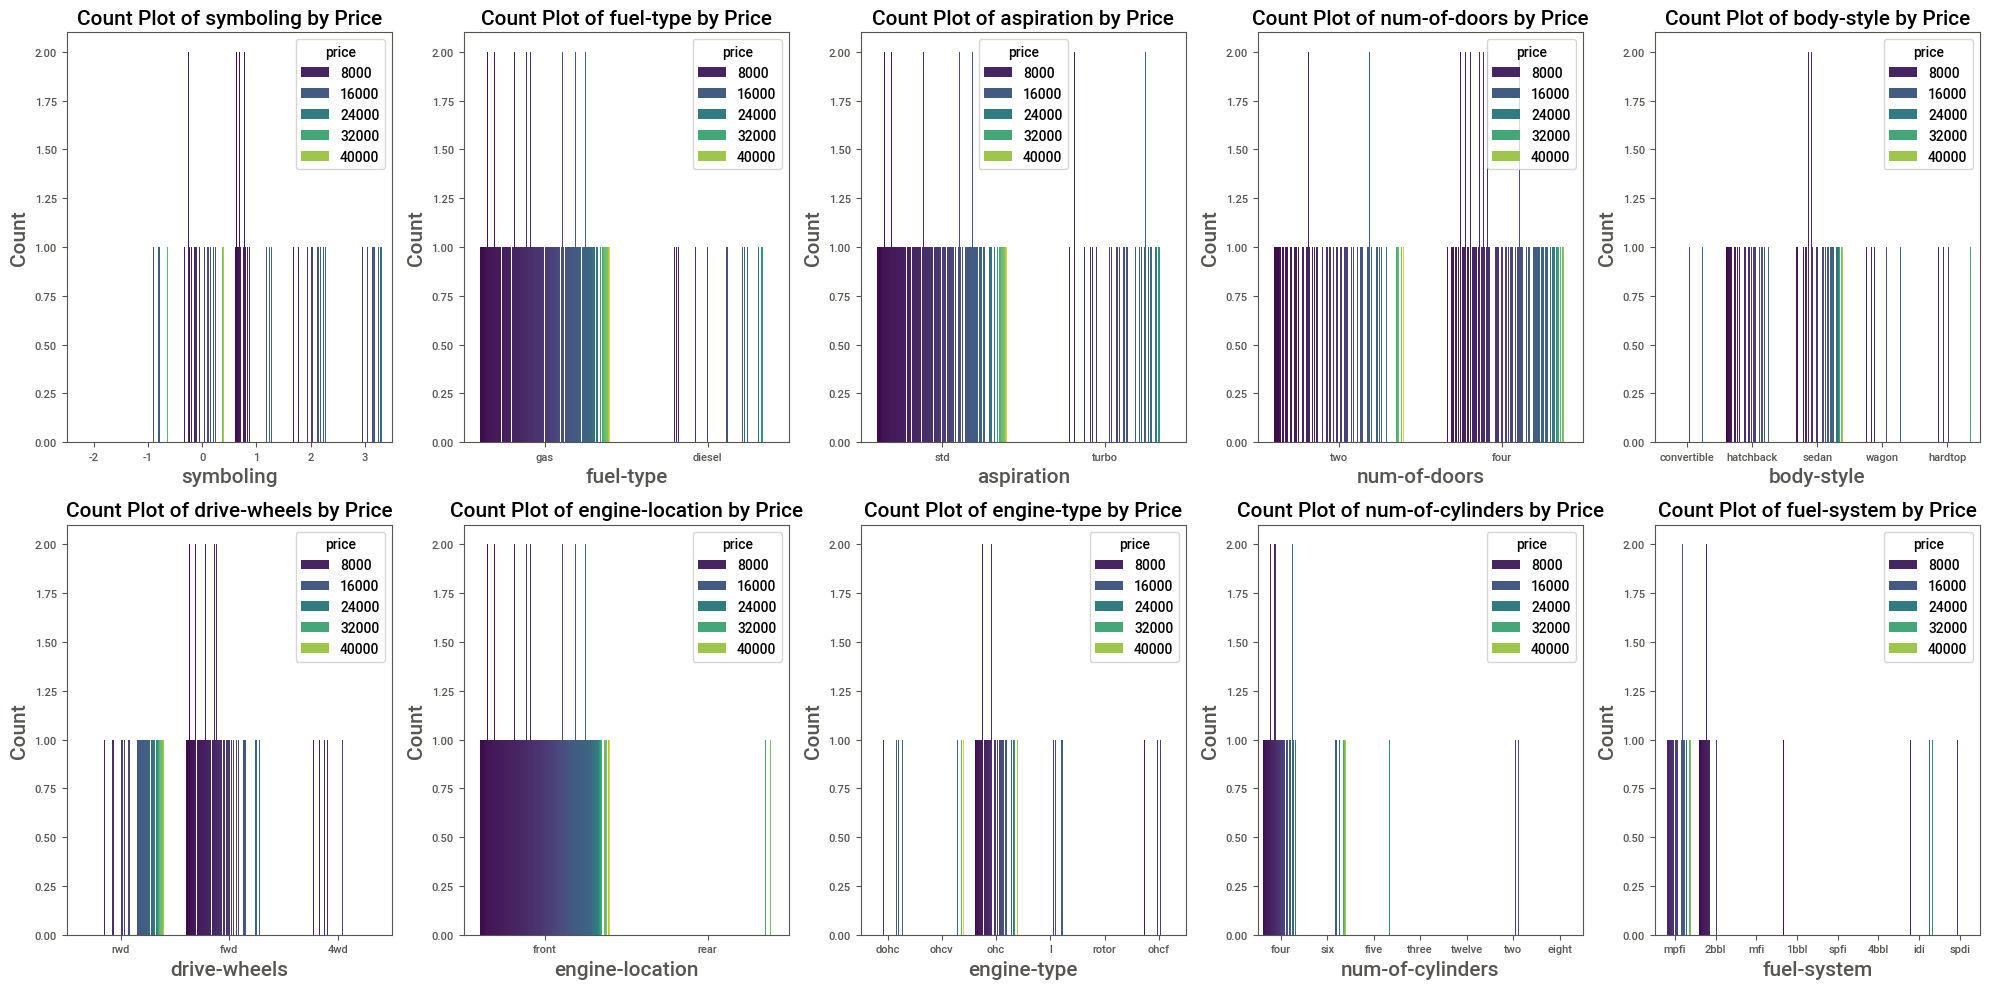

In [37]:
plt.figure(figsize=(20, 10))  # Canvas size
plot_number = 1  # Counter for the number of plots

for column in data4.columns:  # Accessing columns from data3 DataFrame
    ax = plt.subplot(2,5, plot_number) 
    sns.countplot(data=data4, x=column, hue=data['price'], palette='viridis')
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis and increasing its font 
    plt.ylabel('Count', fontsize=15)  # Assigning name to y-axis and increasing its font 
    plt.title(f'Count Plot of {column} by Price', fontsize=15)  # Adding title
    plot_number += 1  # Increasing counter by 1

plt.tight_layout()  # Adjusting the layout
plt.show()  # Showing the plot

# DATA PREPROCESSING 

### CHECKING FOR MISSING VALUES 

In [38]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.830000,1.248557,-2.00,0.0000,1.000000,2.0000,3.00
normalized-losses,200.0,120.740000,32.189645,65.00,100.2500,115.000000,138.2500,256.00
wheel-base,200.0,98.848000,6.038261,86.60,94.5000,97.000000,102.4000,120.90
length,200.0,174.228000,12.347132,141.10,166.6750,173.200000,183.5000,208.10
width,200.0,65.898000,2.102904,60.30,64.1750,65.500000,66.6750,72.00
height,200.0,53.791500,2.428449,47.80,52.0000,54.100000,55.5250,59.80
curb-weight,200.0,2555.705000,518.594552,1488.00,2163.0000,2414.000000,2928.2500,4066.00
engine-size,200.0,126.860000,41.650501,61.00,97.7500,119.500000,142.0000,326.00
bore,200.0,3.330000,0.268562,2.54,3.1500,3.310000,3.5825,3.94
stroke,200.0,3.259847,0.314177,2.07,3.1175,3.290000,3.4100,4.17


### CHECK FOR OUTILERS IN NUMERICAL COLUMN

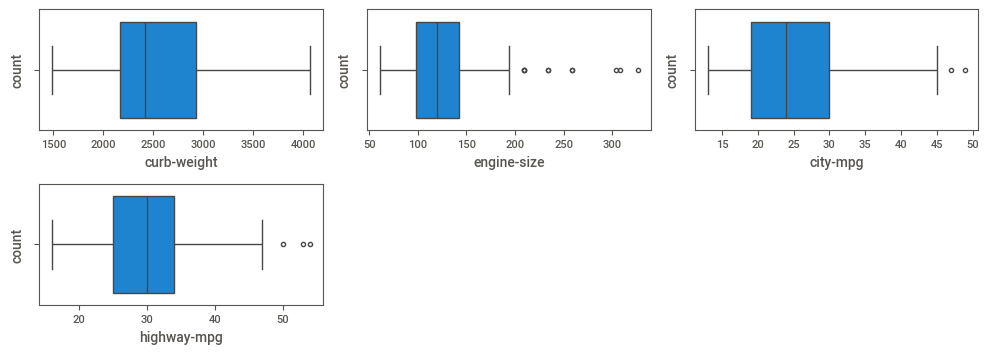

In [40]:
# Checking outliers of numerical column
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data3:
    if plotnumber<=4:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data3[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1  
plt.tight_layout()

#### INSIGHTS 
*Engine-size,city-mpg and highway-way mpg has some outilers

### HANDLE THE OUTILERS

In [41]:
#Handling the outliers for engine-size by using IQR METHOD
Q1=data['engine-size'].quantile(0.25)
print("lower quantile",Q1)
Q3=data['engine-size'].quantile(0.75)
print("upper quantile",Q3)

lower quantile 97.75
upper quantile 142.0


In [42]:
#Find IQR
IQR=Q3-Q1
IQR

44.25

In [43]:
#Find upperlimit and lowerlimit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 31.375
upper limit is 208.375


In [44]:
#Find values above upperlimit
data.loc[data['engine-size']>upper_limit]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
13,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
14,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
43,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
44,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
45,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
67,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
68,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
69,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
70,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


In [45]:
#find the percentage of outliers
len(data.loc[data['engine-size']>upper_limit])/len(data)

0.05

In [46]:
#Handle the outliers 
data.loc[data['engine-size']>upper_limit,'engine-size']=data['engine-size'].median()

<Axes: xlabel='engine-size'>

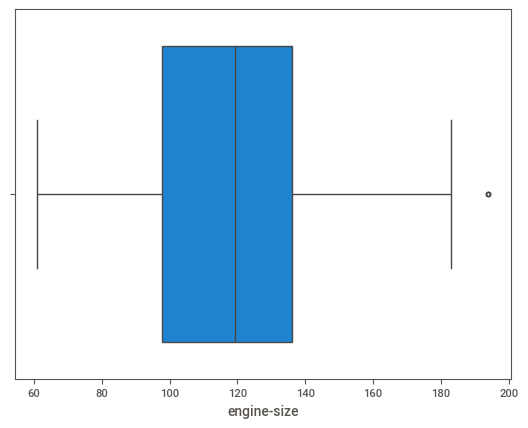

In [47]:
sns.boxplot(x=data['engine-size'])

In [48]:
#Handling the outliers for city-mpg
Q1=data['city-mpg'].quantile(0.25)
print("lower quantile",Q1)
Q3=data['city-mpg'].quantile(0.75)
print("upper quantile",Q3)

lower quantile 19.0
upper quantile 30.0


In [49]:
#Find IQR
IQR=Q3-Q1
IQR

11.0

In [50]:
#Find upperlimit and lowerlimit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 2.5
upper limit is 46.5


In [51]:
#Find values above upperlimit
data.loc[data['city-mpg']>upper_limit]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61.0,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151
28,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92.0,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479


In [52]:
#find the percentage of outliers
len(data.loc[data['city-mpg']>upper_limit])/len(data)

0.01

In [53]:
#Handle the outliers 
data.loc[data['city-mpg']>upper_limit,'city-mpg']=data['city-mpg'].median()

<Axes: xlabel='city-mpg'>

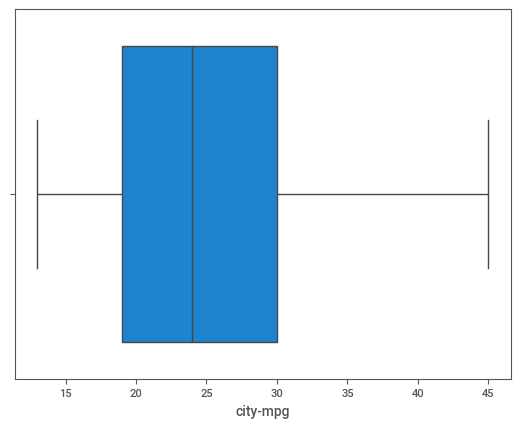

In [54]:
sns.boxplot(x=data['city-mpg'])

In [55]:
#Handling the outliers for city-mpg
Q1=data['highway-mpg'].quantile(0.25)
print("lower quantile",Q1)
Q3=data['highway-mpg'].quantile(0.75)
print("upper quantile",Q3)

lower quantile 25.0
upper quantile 34.0


In [56]:
#Find IQR
IQR=Q3-Q1
IQR

9.0

In [57]:
#Find upperlimit and lowerlimit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 11.5
upper limit is 47.5


In [58]:
#Find values above upperlimit
data.loc[data['highway-mpg']>upper_limit]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61.0,2bbl,2.91,3.03,9.5,48.0,5100.0,24,53,5151
28,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92.0,1bbl,2.91,3.41,9.6,58.0,4800.0,24,54,6479
86,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103.0,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099


In [59]:
#find the percentage of outliers
len(data.loc[data['highway-mpg']>upper_limit])/len(data)

0.015

In [60]:
#Handle the outliers 
data.loc[data['highway-mpg']>upper_limit,'highway-mpg']=data['highway-mpg'].median()

<Axes: xlabel='highway-mpg'>

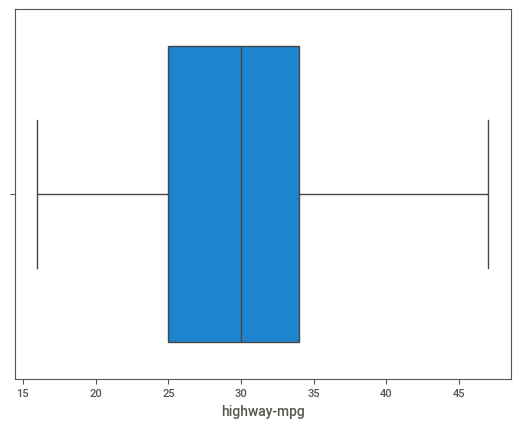

In [61]:
sns.boxplot(x=data['highway-mpg'])

In [62]:
## CONVERSION OF CATEGORICAL COLUMNS 

In [63]:
data2.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi


In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each categorical column and transform it
for col in data2.columns:
    data2[col] = label_encoder.fit_transform(data2[col])

# Now, data2 contains the categorical columns encoded as integers


In [65]:
data2.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,0,1,0,1,0,2,0,0,2,5
1,0,1,0,1,2,2,0,4,3,5
2,1,1,0,0,3,1,0,2,2,5
3,1,1,0,0,3,0,0,2,1,5
4,1,1,0,1,3,1,0,2,1,5


#### INSIGHTS
All the categorical columns are converted into numerical columns

In [66]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your dataframe containing both numerical and categorical columns

# Define the list of columns to exclude from scaling
exclude_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                   'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 
                   'fuel-system', 'price']  # Add more columns as needed

# Select numerical columns to scale (excluding those in the exclude list)
numerical_columns = [col for col in data.columns if col not in exclude_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
scaled_data = scaler.fit_transform(data[numerical_columns])

# Create a DataFrame with scaled numerical data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Combine scaled numerical data with excluded columns
final_df = pd.concat([scaled_df, data[exclude_columns]], axis=1)

# Display the final DataFrame
print(final_df)



     symboling  normalized-losses  wheel-base    length     width    height  \
0     1.742368          -0.178766   -1.701436 -0.440719 -0.857154 -2.060585   
1     0.136499          -0.178766   -0.721882 -0.245855 -0.189737 -0.574437   
2     0.939433           1.347283    0.158057  0.192591  0.143971  0.209918   
3     0.939433           1.347283    0.091646  0.192591  0.239316  0.209918   
4     0.939433          -0.178766    0.158057  0.249427  0.191644 -0.285464   
..         ...                ...         ...       ...       ...       ...   
195  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
196  -1.469370          -0.801643    1.702100  1.183155  1.383459  0.705301   
197  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
198  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
199  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   

     curb-weight  engine-size      bore    stroke  

In [72]:
# Combine scaled numerical data with converted categorical columns
newdata = pd.concat([scaled_df, data2], axis=1)

# Display the combined dataframe
print(newdata)


     symboling  normalized-losses  wheel-base    length     width    height  \
0     1.742368          -0.178766   -1.701436 -0.440719 -0.857154 -2.060585   
1     0.136499          -0.178766   -0.721882 -0.245855 -0.189737 -0.574437   
2     0.939433           1.347283    0.158057  0.192591  0.143971  0.209918   
3     0.939433           1.347283    0.091646  0.192591  0.239316  0.209918   
4     0.939433          -0.178766    0.158057  0.249427  0.191644 -0.285464   
..         ...                ...         ...       ...       ...       ...   
195  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
196  -1.469370          -0.801643    1.702100  1.183155  1.383459  0.705301   
197  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
198  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   
199  -1.469370          -0.801643    1.702100  1.183155  1.431132  0.705301   

     curb-weight  engine-size      bore    stroke  

In [ ]:
newdata.head()

# FEATURE SELECTION 

In [ ]:

# Calculate the correlation matrix
correlation_matrix = newdata.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL BUILDING

In [70]:
newdata

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,1.742368,-0.178766,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,0.355803,0.522603,-1.850239,...,0,1,0,1,0,2,0,0,2,5
1,0.136499,-0.178766,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,1.145680,-2.426370,0.670579,...,0,1,0,1,2,2,0,4,3,5
2,0.939433,1.347283,0.158057,0.192591,0.143971,0.209918,-0.422785,-0.398170,-0.522603,0.447216,...,1,1,0,0,3,1,0,2,2,5
3,0.939433,1.347283,0.091646,0.192591,0.239316,0.209918,0.518648,0.571224,-0.522603,0.447216,...,1,1,0,0,3,0,0,2,1,5
4,0.939433,-0.178766,0.158057,0.249427,0.191644,-0.285464,-0.094153,0.571224,-0.522603,0.447216,...,1,1,0,1,3,1,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,0.766089,0.750742,1.679795,-0.350512,...,21,1,0,0,3,2,0,2,2,5
196,-1.469370,-0.801643,1.702100,1.183155,1.383459,0.705301,0.953602,0.750742,1.679795,-0.350512,...,21,1,1,0,3,2,0,2,2,5
197,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,0.882076,1.899653,0.933219,-1.243966,...,21,1,0,0,3,2,0,4,3,5
198,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,1.278368,0.894356,-1.194521,0.447216,...,21,0,1,0,3,2,0,2,3,3


In [ ]:
# Split the data into features (X) and the target variable (y)
from sklearn.model_selection import train_test_split
X = newdata  
y = data['price']

# Reshape y to match the number of samples in X
y = y.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

## APPLYING DECISION TREE REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Assuming 'X' contains your predictor variables and 'y' contains your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the DecisionTreeRegressor on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_regressor.predict(X_test)


In [ ]:
y_pred

## EVALUATE THE MODEL

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with the DecisionTreeRegressor and the hyperparameters grid
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with best model:", mse)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)

# Calculate and print R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) with best model:", r2)

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) with best model:", mae)


## APPLYING RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) with Random Forest:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) with Random Forest:", mae)


### COMPARING THE RANDOM FOREST REGRESSOR AND  DECISION TREE REGRESSOR

#Comparing the performance of the Decision Tree Regressor and Random Forest Regressor models:

R-squared (R2):

*Decision Tree Regressor: R2 = 0.893

*Random Forest Regressor: R2 = 0.910

*Both models have relatively high R-squared values, indicating that they capture a substantial portion of the variability in the target variable.

*The Random Forest model slightly outperforms the Decision Tree model in terms of R-squared, suggesting that it provides a better fit to the data.

Mean Absolute Error (MAE):

*Decision Tree Regressor: MAE = 2076.64

*Random Forest Regressor: MAE = 1964.17

*The MAE of the Random Forest model (1964.17) is lower than that of the Decision Tree model (2076.64).

*A lower MAE indicates that the Random Forest model's predictions are, on average, closer to the true values compared to the Decision Tree model.

Insights:

Both models perform reasonably well, as indicated by their high R-squared values and relatively low MAE values.
However, the Random Forest model shows a slight improvement over the Decision Tree model in terms of both R-squared and MAE.
The Random Forest model's ensemble nature and ability to reduce overfitting contribute to its superior performance compared to a single Decision Tree.
Overall, based on these metrics, the Random Forest model appears to be the better choice for 
predicting car prices, as it provides a slightly better fit to the data and more accurate predictions 
compared to the Decision Tree model.

# CONCLUSION

#### INTRODUCTION:

The purpose of this report is to document the challenges encountered during the data analysis process and 
the techniques employed to address them. The dataset used for analysis pertains to auto price prediction,
with the goal of predicting the price of the automobile.

## CHALLENGES FACED AND TECHNIQUE USED

### Handling Missing Values:
*One of the main challenges was dealing with missing values in the dataset. Several columns 
 contained missing data, which needed to be addressed before training the models.

*Techniques such as mean or median imputation were used to fill in missing values for numerical 
 features, while mode imputation was used for categorical features.
 
### Encoding Categorical Variables:
*Another challenge was encoding categorical variables for model training. Many machine learning 
 algorithms require numerical input, so categorical variables needed to be transformed appropriately.

*Techniques such as one-hot encoding or label encoding were used to convert categorical 
 variables into a numerical format that the models could interpret.

### Feature Scaling:

*Some regression algorithms, such as the Decision Tree Regressor, do not require feature scaling. 
 However, others, such as the Random Forest Regressor, benefit from having features on the same scale.

*Scaling numerical features to a standard range (e.g., between 0 and 1) was necessary to ensure optimal performance of the models.

### Model Selection:

*Selecting the most appropriate regression model for the dataset was a challenge. There are 
 various regression algorithms to choose from, each with its strengths and weaknesses.

*Experimentation with different models, such as Decision Tree Regressor and Random Forest 
 regressor, was required to determine which one yielded the best results for predicting car price    

## Techniques Used:

### Imputation:
*Mean or median imputation was used to fill in missing values for numerical features.

*Mode imputation was used for categorical features with missing values.

### Encoding:
*Categorical variables were encoded using techniques such as label encoding.

*This transformation allowed categorical variables to be represented as numerical values suitable for model training.

### Feature Scaling:
*Numerical features were scaled using techniques such as Min-Max scaling or Standardization to 
 ensure all features were on the same scale.

*This preprocessing step helped improve the convergence and performance of the regression models.

### Model Evaluation:
*Metrics such as R-squared (R2) and Mean Absolute Error (MAE) were used to evaluate the performance of the regression models.

*These metrics provided insights into how well the models were able to predict car prices based on the given features.

### Model Selection:
*Different regression algorithms were experimented with, including Decision Tree Regressor and Random Forest Regressor.

*The performance of each model was evaluated using model evaluation metrics to select the best-performing model for predicting car prices.



Overall, by employing these techniques and overcoming the challenges faced, we were able to develop 
robust regression models capable of predicting car prices accurately based on the available dataset